In [81]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, balanced_accuracy_score

from scipy.io import loadmat

from pyod.utils.utility import standardizer

import numpy as np

# Exercise 1 - Implement LODA from scratch

## 1.1 Generate data

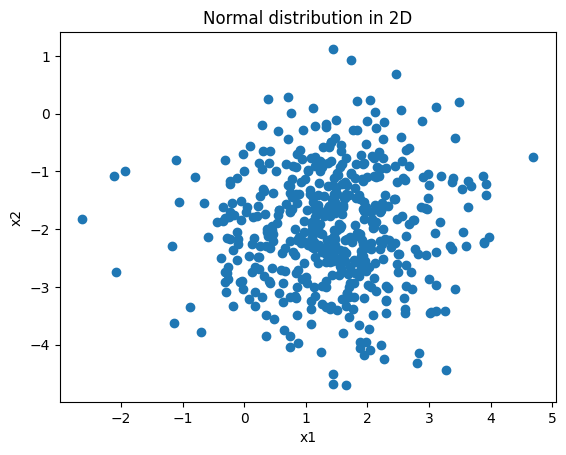

In [2]:
import matplotlib.pyplot as plt
X = make_blobs(n_samples=500, n_features=2, centers=1, cluster_std=1.0, center_box=(-2.0, 2.0))[0]
plt.scatter(X[:,0], X[:,1])
plt.title("Normal distribution in 2D")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 1.2 Draw 5 vectors

In [7]:
random_vectors = np.random.multivariate_normal(mean=np.zeros(2), cov=np.eye(2), size=5)

random_vectors = random_vectors / np.linalg.norm(random_vectors, axis=1)[:, np.newaxis]

In [8]:
# project the data
X_projected = np.dot(X, random_vectors.T)

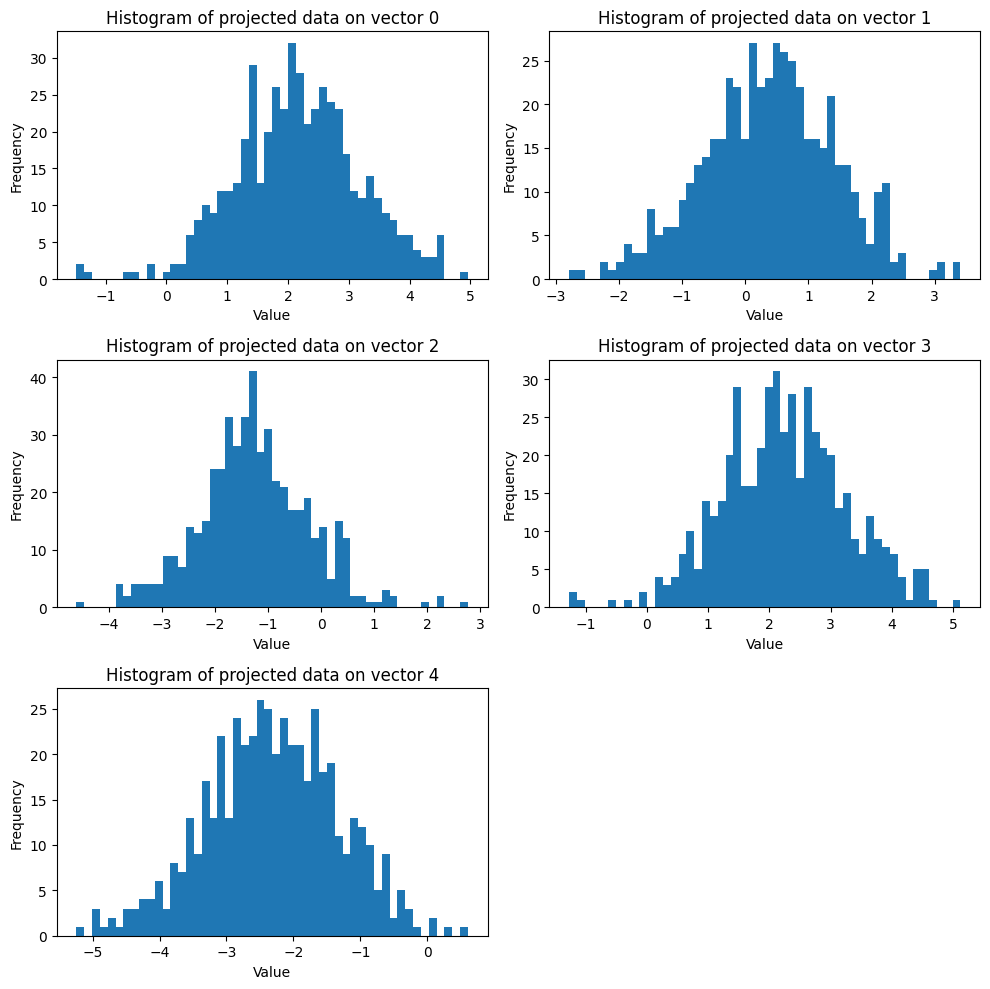

In [9]:
# plot the 5 histograms

no_bins = 50

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.hist(X_projected[:, i], bins=no_bins)
    plt.title(f"Histogram of projected data on vector {i}" )
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [12]:
histograms = []
bin_edges = []

for i in range(5):
    histogram, bins = np.histogram(X_projected[:, i], range=[-4, 4], bins=no_bins)
    histograms.append(histogram)
    bin_edges.append(bins)

histograms = np.array(histograms)

probabilities_distributions = []

for i in range(5):
    probabilities = []
    for j in range(no_bins):
        probabilities.append(histograms[i, j] / no_bins)

    probabilities_distributions.append(probabilities)

probabilities_distributions = np.array(probabilities_distributions)

means = np.mean(probabilities_distributions, axis=0)
means

array([0.02 , 0.064, 0.076, 0.068, 0.1  , 0.12 , 0.112, 0.188, 0.144,
       0.188, 0.196, 0.184, 0.232, 0.236, 0.276, 0.256, 0.308, 0.208,
       0.24 , 0.224, 0.224, 0.176, 0.172, 0.22 , 0.176, 0.164, 0.208,
       0.24 , 0.208, 0.256, 0.216, 0.216, 0.216, 0.344, 0.284, 0.204,
       0.272, 0.344, 0.34 , 0.264, 0.224, 0.26 , 0.244, 0.18 , 0.148,
       0.148, 0.08 , 0.096, 0.092, 0.072])

## 1.3 Generate 500 data points and plot anomaly scores

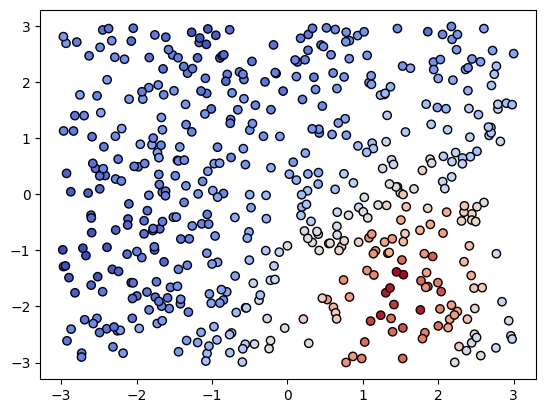

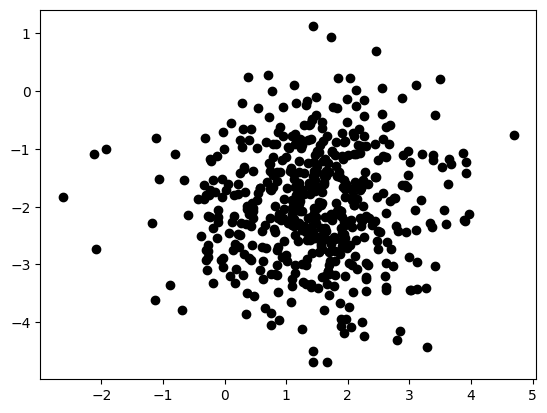

In [ ]:
X_test = np.random.uniform(-3, 3, size=(500, 2))

X_projected_test = np.dot(X_test, random_vectors.T)

probabilities_test = []

for i in range(5):
    dimension = X_projected_test[:, i]
    probabilities = probabilities_distributions[i]
    probabilities_test.append(probabilities[np.digitize(dimension, bin_edges[i]) - 1])

probabilities_test = np.array(probabilities_test).mean(axis=0)
    


# plot
plt.scatter(X_test[:,0], X_test[:, 1], c=probabilities_test, cmap='coolwarm', marker='o', edgecolor='k')
plt.show()
plt.scatter(X[:,0], X[:,1], c='black')

# 1.4 Lodaferent number of bins

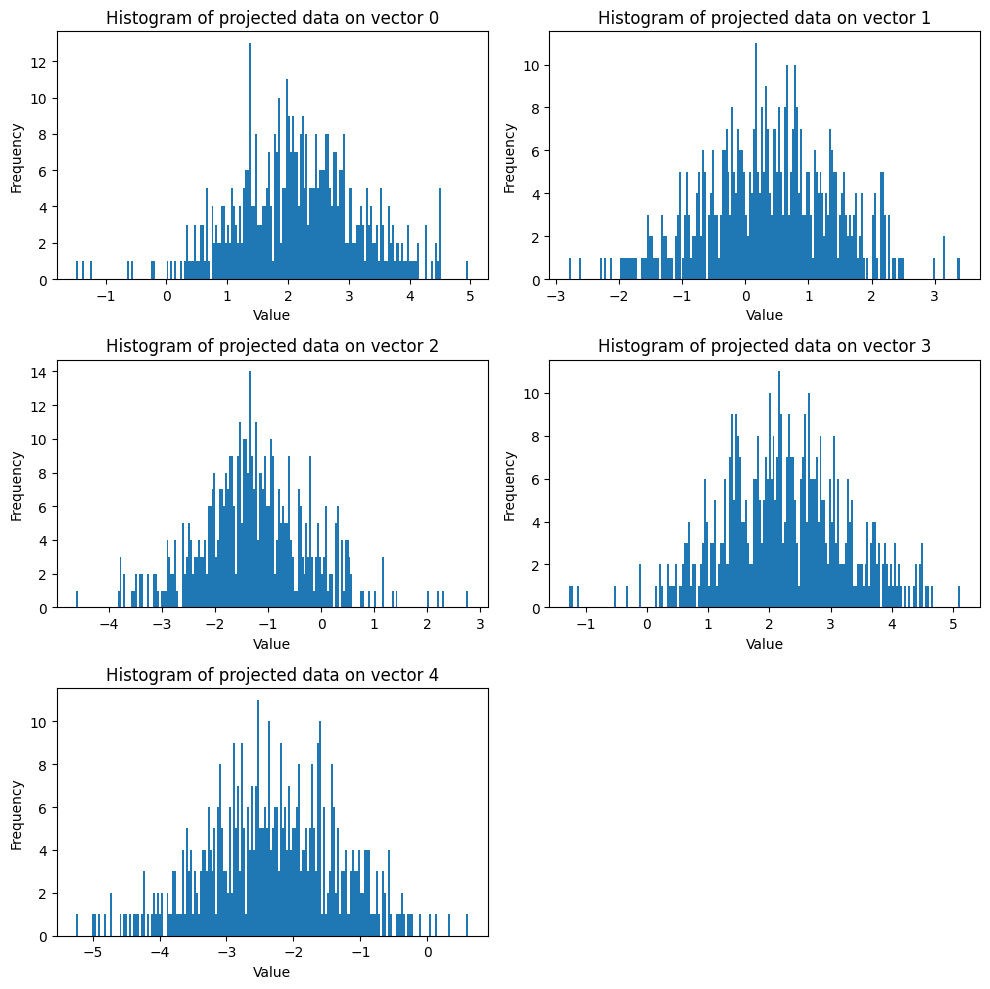

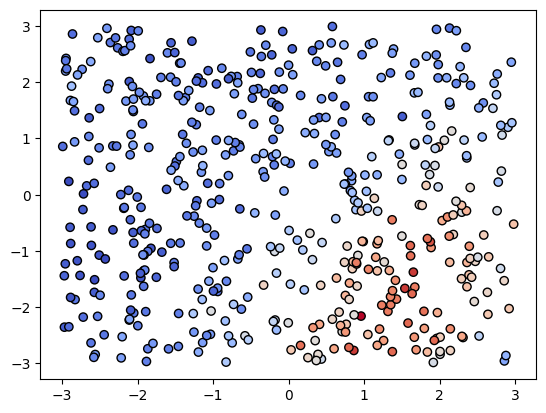

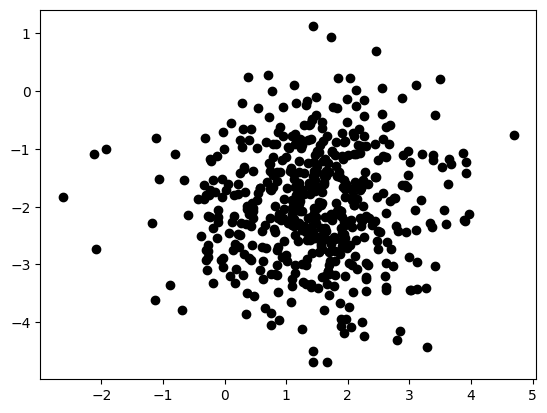

In [19]:
# plot the 5 histograms

no_bins = 200

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.hist(X_projected[:, i], bins=no_bins)
    plt.title(f"Histogram of projected data on vector {i}" )
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


histograms = []
bin_edges = []

for i in range(5):
    histogram, bins = np.histogram(X_projected[:, i], range=[-4, 4], bins=no_bins)
    histograms.append(histogram)
    bin_edges.append(bins)

histograms = np.array(histograms)

probabilities_distributions = []

for i in range(5):
    probabilities = []
    for j in range(no_bins):
        probabilities.append(histograms[i, j] / no_bins)

    probabilities_distributions.append(probabilities)

probabilities_distributions = np.array(probabilities_distributions)

means = np.mean(probabilities_distributions, axis=0)


X_test = np.random.uniform(-3, 3, size=(500, 2))

X_projected_test = np.dot(X_test, random_vectors.T)

probabilities_test = []

for i in range(5):
    dimension = X_projected_test[:, i]
    probabilities = probabilities_distributions[i]
    probabilities_test.append(probabilities[np.digitize(dimension, bin_edges[i]) - 1])

probabilities_test = np.array(probabilities_test).mean(axis=0)
    


# plot
plt.scatter(X_test[:,0], X_test[:, 1], c=probabilities_test, cmap='coolwarm', marker='o', edgecolor='k')
plt.show()
plt.scatter(X[:,0], X[:,1], c='black')

# 2.1 Generate 2 clusters of 2-dimensional data

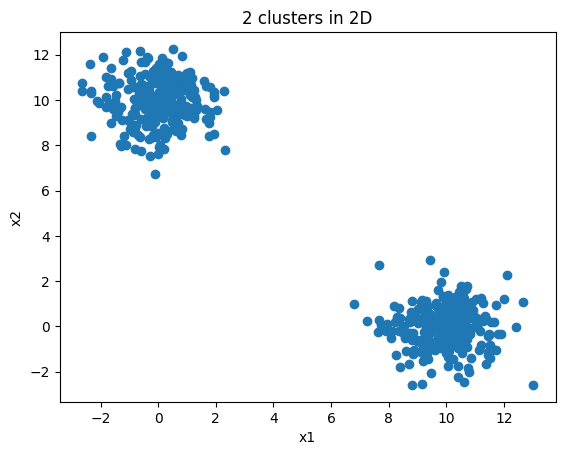

In [47]:
X, _ =make_blobs(n_samples=500, n_features=2, centers=[[10, 0], [0, 10]], cluster_std=1.0)

# plot the data

plt.scatter(X[:,0], X[:,1])
plt.title("2 clusters in 2D")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# 2.2-2.5 Use IForest/ Loda/ LODA models and plot scores

In [48]:
from pyod.models import iforest, loda, dif


Iforest = iforest.IForest(contamination=0.02)
Loda = loda.LODA(contamination=0.02)
Dif = dif.DIF(contamination=0.02)

Iforest.fit(X)
Loda.fit(X)
Dif.fit(X)

DIF(batch_size=1000, contamination=0.02, device=device(type='cpu'),
  hidden_activation='tanh', hidden_neurons=[500, 100], max_samples=256,
  n_ensemble=50, n_estimators=6, random_state=None, representation_dim=20,
  skip_connection=False)

In [49]:
X_test = np.random.uniform(-10, 20, size=(1000, 2))

y_iforest = Iforest.decision_function(X_test)
y_loda = Loda.decision_function(X_test)
y_dif = Dif.decision_function(X_test)

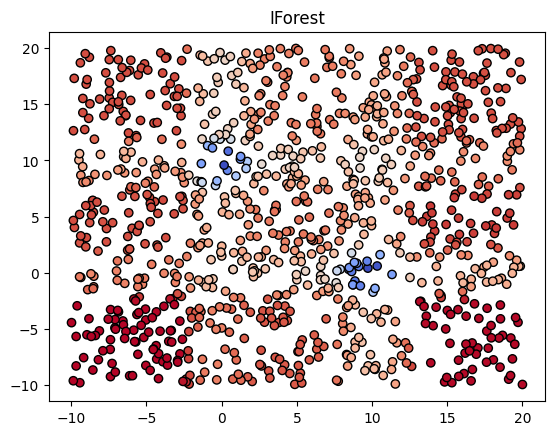

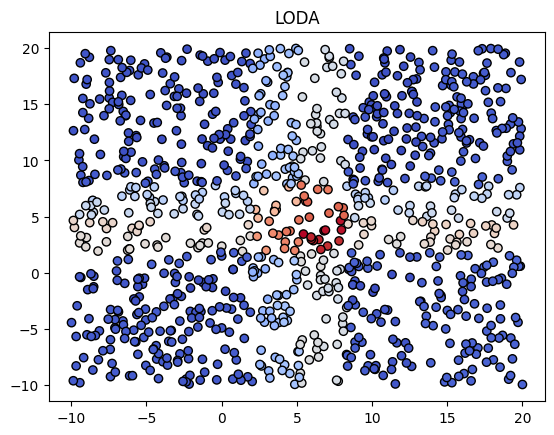

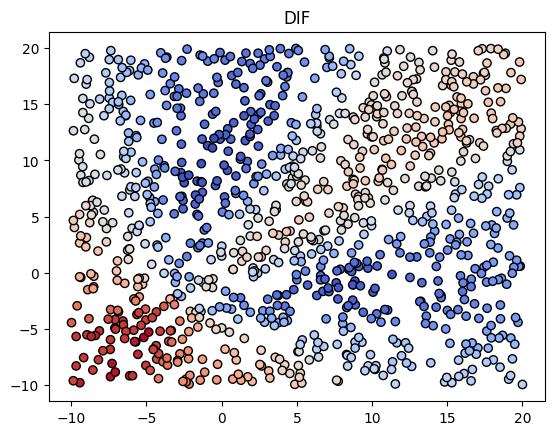

In [50]:
plt.title("IForest")
plt.scatter(X_test[:,0], X_test[:,1], c=y_iforest, cmap='coolwarm', marker='o', edgecolor='k')
plt.show()

plt.title("LODA")
plt.scatter(X_test[:,0], X_test[:,1], c=y_loda, cmap='coolwarm', marker='o', edgecolor='k')
plt.show()

plt.title("DIF")
plt.scatter(X_test[:,0], X_test[:,1], c=y_dif, cmap='coolwarm', marker='o', edgecolor='k')
plt.show()

# 2.5 Modify LODA & DIF

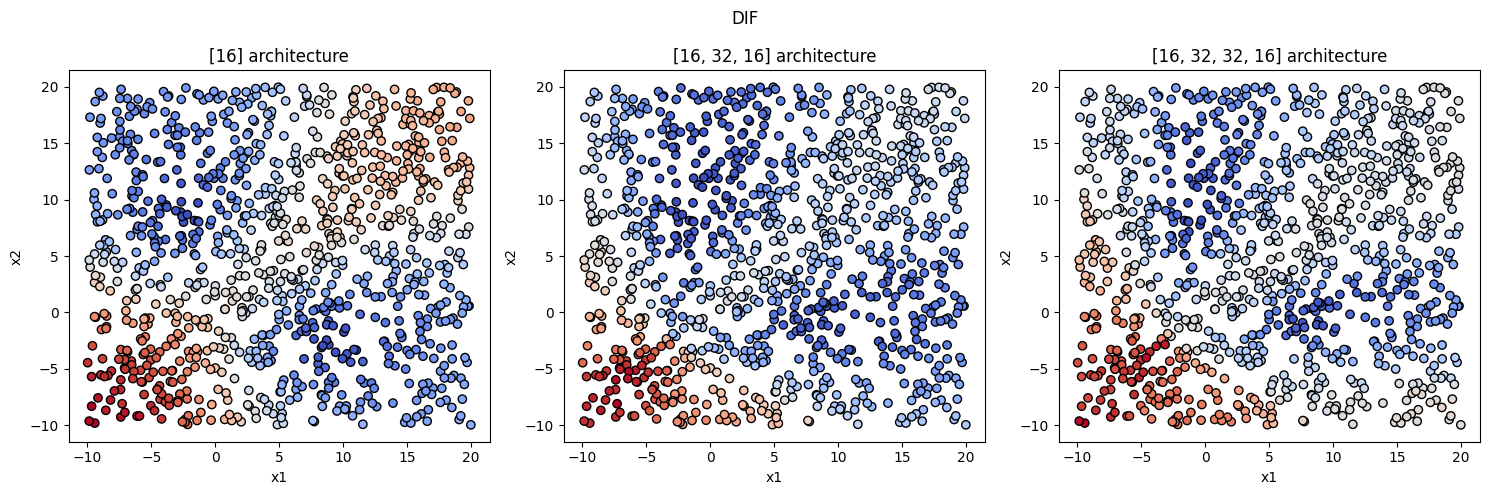

In [51]:
# draw 3 subplots

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle("DIF")

for i, architecture in enumerate([[16], [16, 32, 16], [16, 32, 32, 16]]):
    Dif = dif.DIF(contamination=0.02, hidden_neurons=architecture)
    Dif.fit(X)

    y_dif = Dif.decision_function(X_test)

    axs[i].scatter(X_test[:,0], X_test[:,1], c=y_dif, cmap='coolwarm', marker='o', edgecolor='k')
    axs[i].set_xlabel("x1")
    axs[i].set_ylabel("x2")
    axs[i].set_title(f'{architecture} architecture')

plt.tight_layout()
plt.show()

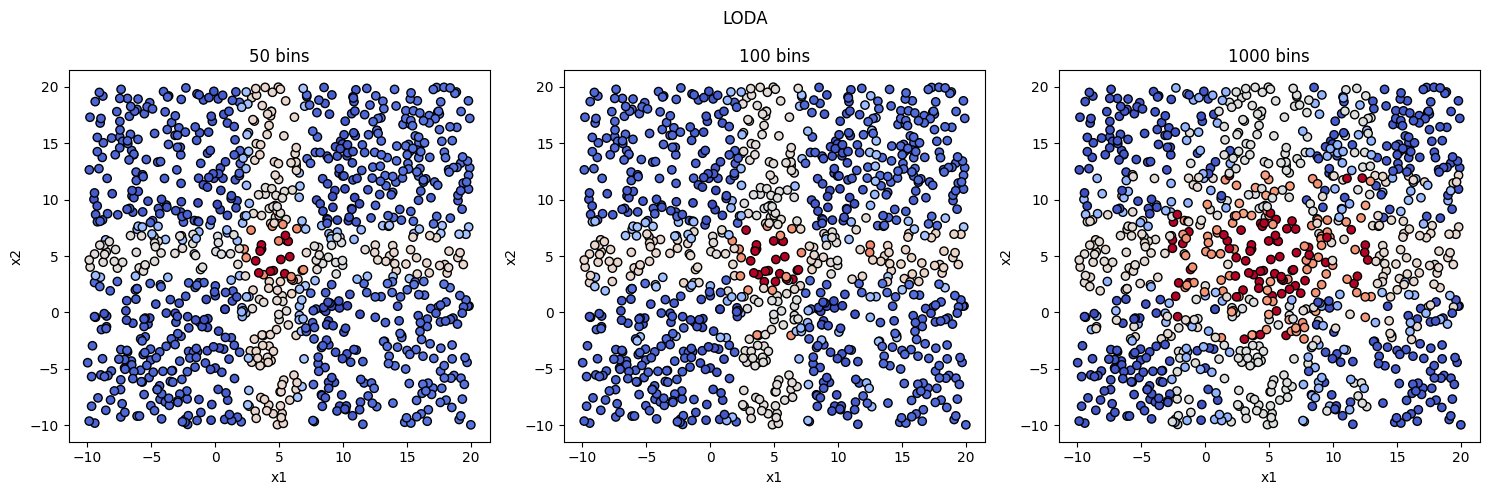

In [59]:
# draw 3 subplots

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle("LODA")

for i, bins in enumerate([50, 100, 1000]):
    Loda = loda.LODA(contamination=0.02, n_bins=bins, n_random_cuts=1000)
    Loda.fit(X)

    y_loda = Loda.decision_function(X_test)

    axs[i].scatter(X_test[:,0], X_test[:,1], c=y_loda, cmap='coolwarm', marker='o', edgecolor='k')
    axs[i].set_xlabel("x1")
    axs[i].set_ylabel("x2")
    axs[i].set_title(f'{bins} bins')

plt.tight_layout()
plt.show()

# Ex 2.6 redo for 3D data

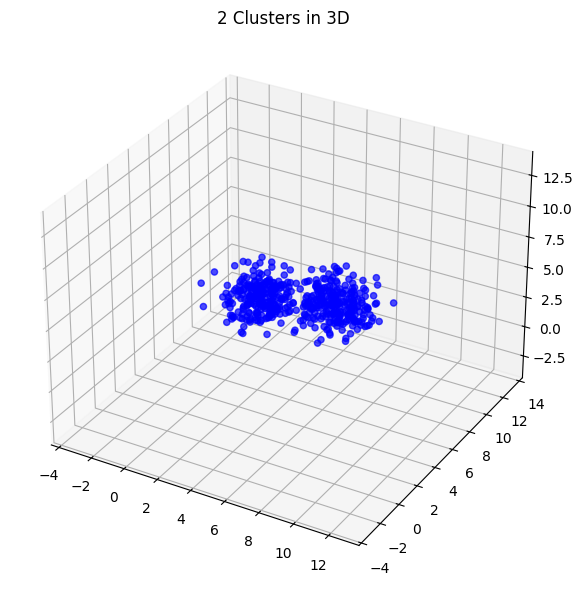

In [69]:
from mpl_toolkits.mplot3d import Axes3D
X, _ = make_blobs(n_samples=500, n_features=3, centers=[[0, 10, 0], [10, 0, 10]], cluster_std=1.0)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', alpha=0.7)

ax.set_title("2 Clusters in 3D")

plt.tight_layout()
plt.show()

In [70]:
Iforest = iforest.IForest(contamination=0.02)
Loda = loda.LODA(contamination=0.02)
Dif = dif.DIF(contamination=0.02)

Iforest.fit(X)
Loda.fit(X)
Dif.fit(X)

DIF(batch_size=1000, contamination=0.02, device=device(type='cpu'),
  hidden_activation='tanh', hidden_neurons=[500, 100], max_samples=256,
  n_ensemble=50, n_estimators=6, random_state=None, representation_dim=20,
  skip_connection=False)

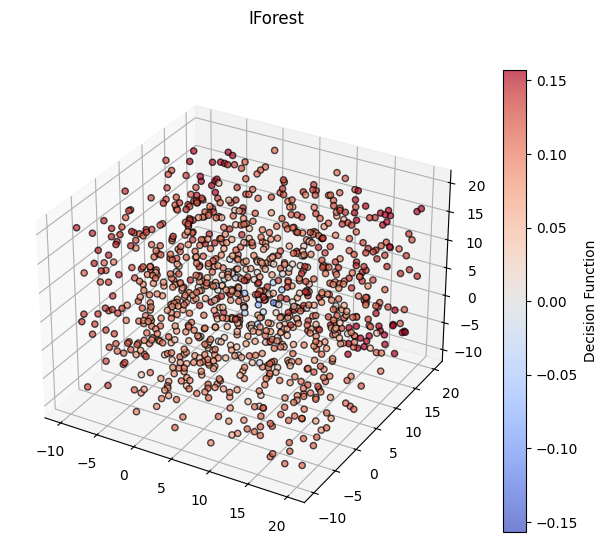

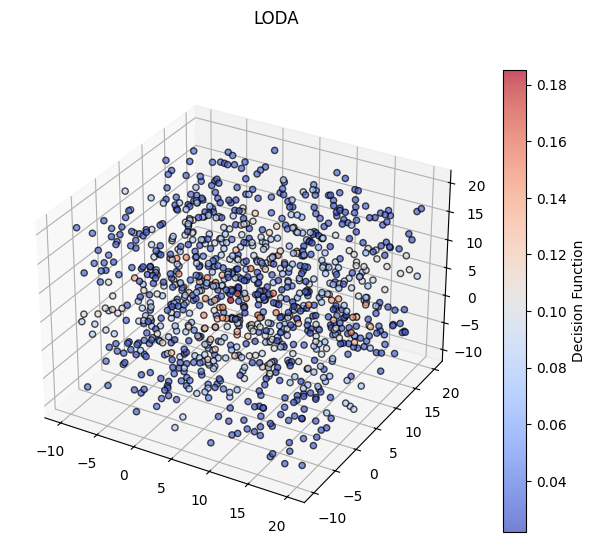

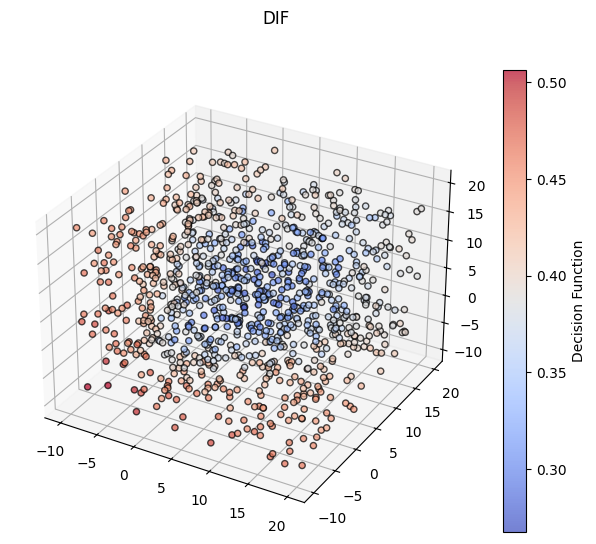

In [74]:
X_test = np.random.uniform(-10, 20, size=(1000, 3))

y_iforest = Iforest.decision_function(X_test)
y_loda = Loda.decision_function(X_test)
y_dif = Dif.decision_function(X_test)

def plot_3d(title, X, y, cmap):
    fig = plt.figure(figsize=(8, 6))
    fig.suptitle(title)
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap, marker='o', edgecolor='k', alpha=0.7)
    fig.colorbar(scatter, ax=ax, label="Decision Function")
    plt.show()

plot_3d("IForest", X_test, y_iforest, cmap='coolwarm')
plot_3d("LODA", X_test, y_loda, cmap='coolwarm')
plot_3d("DIF", X_test, y_dif, cmap='coolwarm')

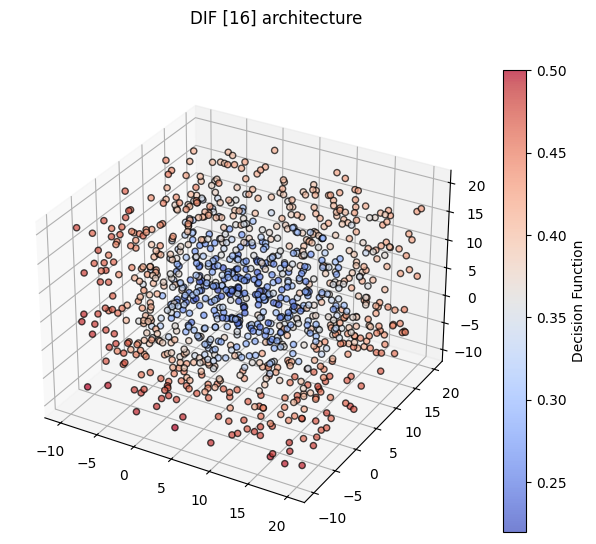

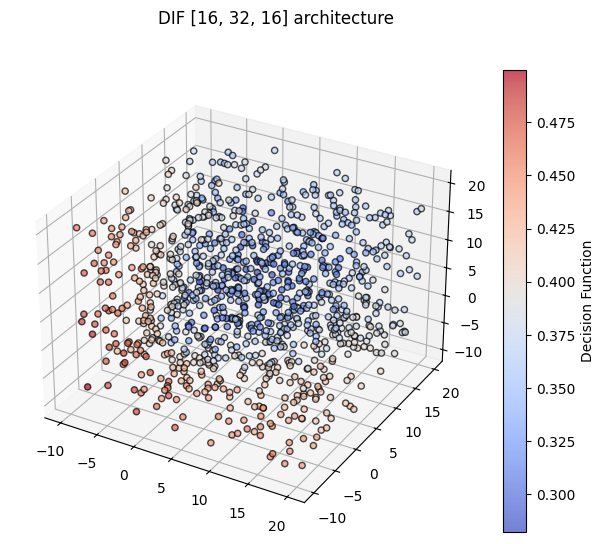

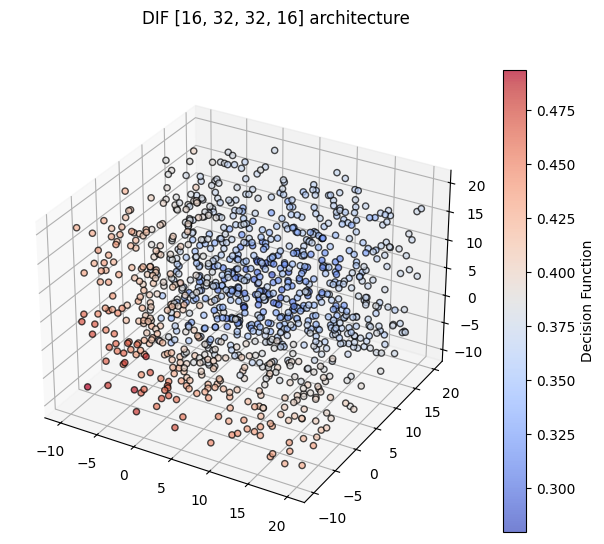

In [75]:
for architecture in [[16], [16, 32, 16], [16, 32, 32, 16]]:
    Dif = dif.DIF(contamination=0.02, hidden_neurons=architecture)
    Dif.fit(X)

    y_dif = Dif.decision_function(X_test)

    plot_3d(f"DIF {architecture} architecture", X_test, y_dif, cmap='coolwarm')

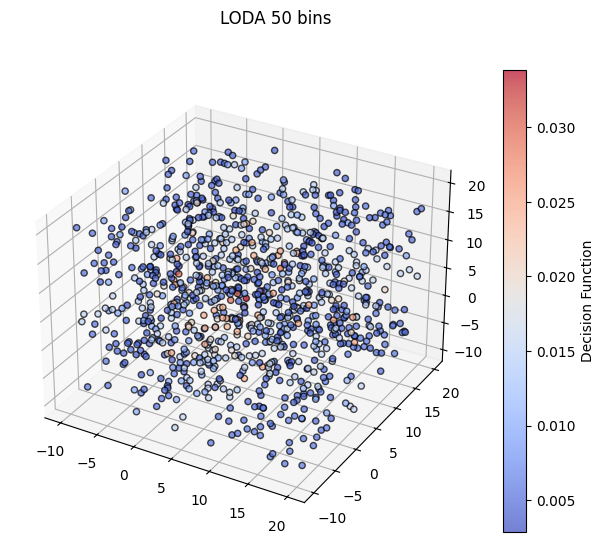

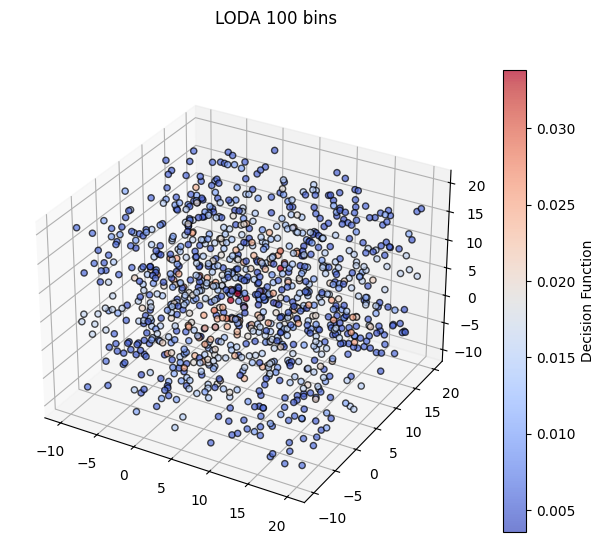

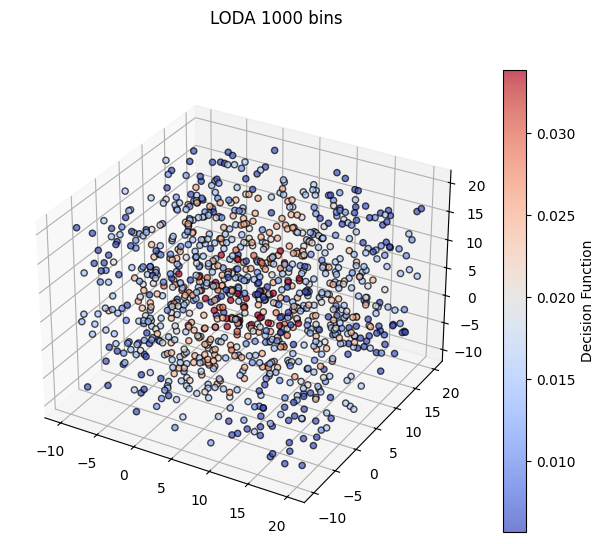

In [76]:
for bin in [50, 100, 1000]:
    Loda = loda.LODA(contamination=0.02, n_bins=bin, n_random_cuts=1000)
    Loda.fit(X)

    y_loda = Loda.decision_function(X_test)

    plot_3d(f"LODA {bin} bins", X_test, y_loda, cmap='coolwarm')

# 3.1 Data preprocessing

In [ ]:
shuttle = loadmat('./shuttle.mat')
X = shuttle['X']
y = shuttle['y']


balanced_accuracies = []
roc_auc_scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=np.random.randint(0, 1000) + i)

    X_train = standardizer(X_train)
    X_test = standardizer(X_test)

    # Fit IForest, LODA and DIF using the training data and compute the
    # balanced accuracy (BA) and the area under the curve (ROC AUC-
    # using sklearn.metrics.roc auc score) for each model. Compute the
    # mean BA and ROC AUC obtained for 10 different train-test splits for
    # each of the models.

    Iforest = iforest.IForest(contamination=0.02)
    Loda = loda.LODA(contamination=0.02)
    Dif = dif.DIF(contamination=0.02)

    Iforest.fit(X_train)
    Loda.fit(X_train)
    Dif.fit(X_train)

    y_iforest = Iforest.decision_function(X_test)
    y_loda = Loda.decision_function(X_test)
    y_dif = Dif.decision_function(X_test)

    threshold = 0.3

    y_iforest = (y_iforest > np.percentile(y_iforest, 100 * (1 - threshold))).astype(int)
    y_loda = (y_loda > np.percentile(y_loda, 100 * (1 - threshold))).astype(int)
    y_dif = (y_dif > np.percentile(y_dif, 100 * (1 - threshold))).astype(int)
    
    balanced_accuracies.append([balanced_accuracy_score(y_test, y_iforest), balanced_accuracy_score(y_test, y_loda), balanced_accuracy_score(y_test, y_dif)])
    roc_auc_scores.append([roc_auc_score(y_test, y_iforest), roc_auc_score(y_test, y_loda), roc_auc_score(y_test, y_dif)])

    print(f"Split {i+1} done!")
    print(f"Balanced Accuracies: {balanced_accuracies[-1]}")
    print(f"ROC AUC Scores: {roc_auc_scores[-1]}")

balanced_accuracies = np.array(balanced_accuracies)
roc_auc_scores = np.array(roc_auc_scores)

print(f"Mean Balanced Accuracies: {balanced_accuracies.mean(axis=0)}")
print(f"Mean ROC AUC Scores: {roc_auc_scores.mean(axis=0)}")



Split 1 done!
Balanced Accuracies: [0.8757136129667382, 0.5590700958638626, 0.8690657181889418]
ROC AUC Scores: [0.8757136129667381, 0.5590700958638627, 0.8690657181889418]
Split 2 done!
Balanced Accuracies: [0.8738844430735644, 0.4857491830323235, 0.8707457849102604]
ROC AUC Scores: [0.8738844430735644, 0.4857491830323235, 0.8707457849102604]
Split 3 done!
Balanced Accuracies: [0.8768366228070175, 0.48452083960347614, 0.8714492768957777]
ROC AUC Scores: [0.8768366228070176, 0.48452083960347614, 0.8714492768957777]
Split 4 done!
Balanced Accuracies: [0.872546566087739, 0.8576044668952318, 0.8693929969536962]
ROC AUC Scores: [0.8725465660877388, 0.8576044668952318, 0.8693929969536962]
